In [115]:
import random as rd
data_set = []
N = 1
k = 1999
for x in range(10000):
    if x >= k:
        N+=1
        k+=1999
    new_mas = [rd.randint(1*N,21*N),rd.randint(1*N,21*N),rd.randint(1*N,21*N),rd.randint(1*N,21*N),rd.randint(1*N,21*N),
               rd.randint(1*N,21*N),rd.randint(1*N,10*N),rd.randint(0,50),
                   rd.randint(1,15),rd.randint(0,50000)]
    if N > 5:
        N = 5
    data_set.append(new_mas+[N])

In [116]:
import pandas as pd
df = pd.DataFrame(data_set,columns=['Tag_1','Tag_2','Tag_3','Tag_4','Tag_5','Tag_6','Main_Tag','Materials','Store','Cost','Cluster'])
df.head()

,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Main_Tag,Materials,Store,Cost,Cluster
0,17,17,8,4,9,15,9,34,13,33649,1
1,10,21,8,2,14,9,10,19,15,37398,1
2,20,4,20,18,7,15,2,43,2,20498,1
3,15,14,9,1,6,11,6,34,6,28317,1
4,5,10,14,11,15,4,9,14,5,44820,1


In [117]:
df.sample(n=10)

,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Main_Tag,Materials,Store,Cost,Cluster
130,3,6,20,18,17,13,10,16,10,23498,1
8390,84,33,6,15,85,72,8,36,10,15269,5
8422,34,12,42,47,68,45,30,33,12,48245,5
4767,32,15,44,62,44,50,12,2,3,20697,3
9092,105,73,87,47,91,65,42,23,8,11062,5
752,17,1,19,19,10,7,1,19,14,15845,1
6428,70,66,31,23,61,63,29,35,4,17673,4
601,13,2,8,15,17,17,1,8,11,48888,1
1123,11,12,16,8,10,6,3,19,11,27034,1
2556,22,28,39,30,31,6,11,17,9,7381,2


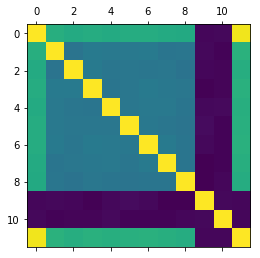

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('train.csv')
plt.matshow(df.corr())
plt.show();

In [9]:
df_1 = df
df_1['Store'] = df.apply(lambda row: row.Cluster, axis=1)

In [12]:
df_1.head()

,Unnamed: 0,Tag_1,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Main_Tag,Materials,Store,Cost,Cluster
0,0,12,18,18,12,4,12,5,20,1,44325,1
1,1,11,2,15,21,17,5,8,8,1,1879,1
2,2,16,17,11,14,17,1,1,8,1,1821,1
3,3,8,16,19,5,14,11,7,10,1,4492,1
4,4,20,4,11,11,9,9,12,21,1,29162,1


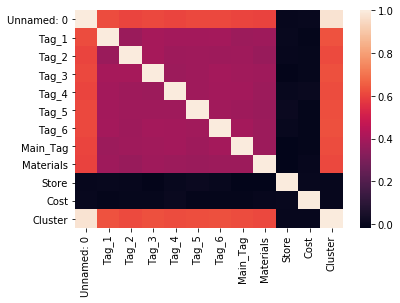

In [13]:
df_1.corr()
sns.heatmap(corr_matrix);

In [3]:
import seaborn as sns

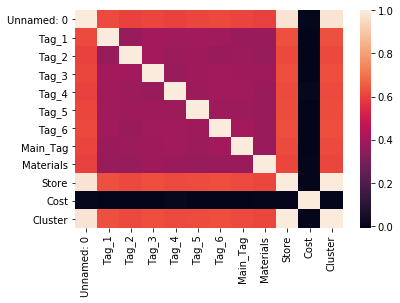

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

In [19]:
df.columns

Index(['Unnamed: 0', 'Tag_1', 'Tag_2', 'Tag_3', 'Tag_4', 'Tag_5', 'Tag_6',
       'Main_Tag', 'Materials', 'Store', 'Cost', 'Cluster'],
      dtype='object')

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df['col'] = df.columns.astype('category').cat.codes

cmap = plt.cm.get_cmap('jet', df.columns.nunique())

ax = df.plot.scatter(
    Store='x',Cost='y', Cluster='col',
    cmap=cmap
)
plt.show()

AttributeError: 'CategoricalIndex' object has no attribute 'cat'

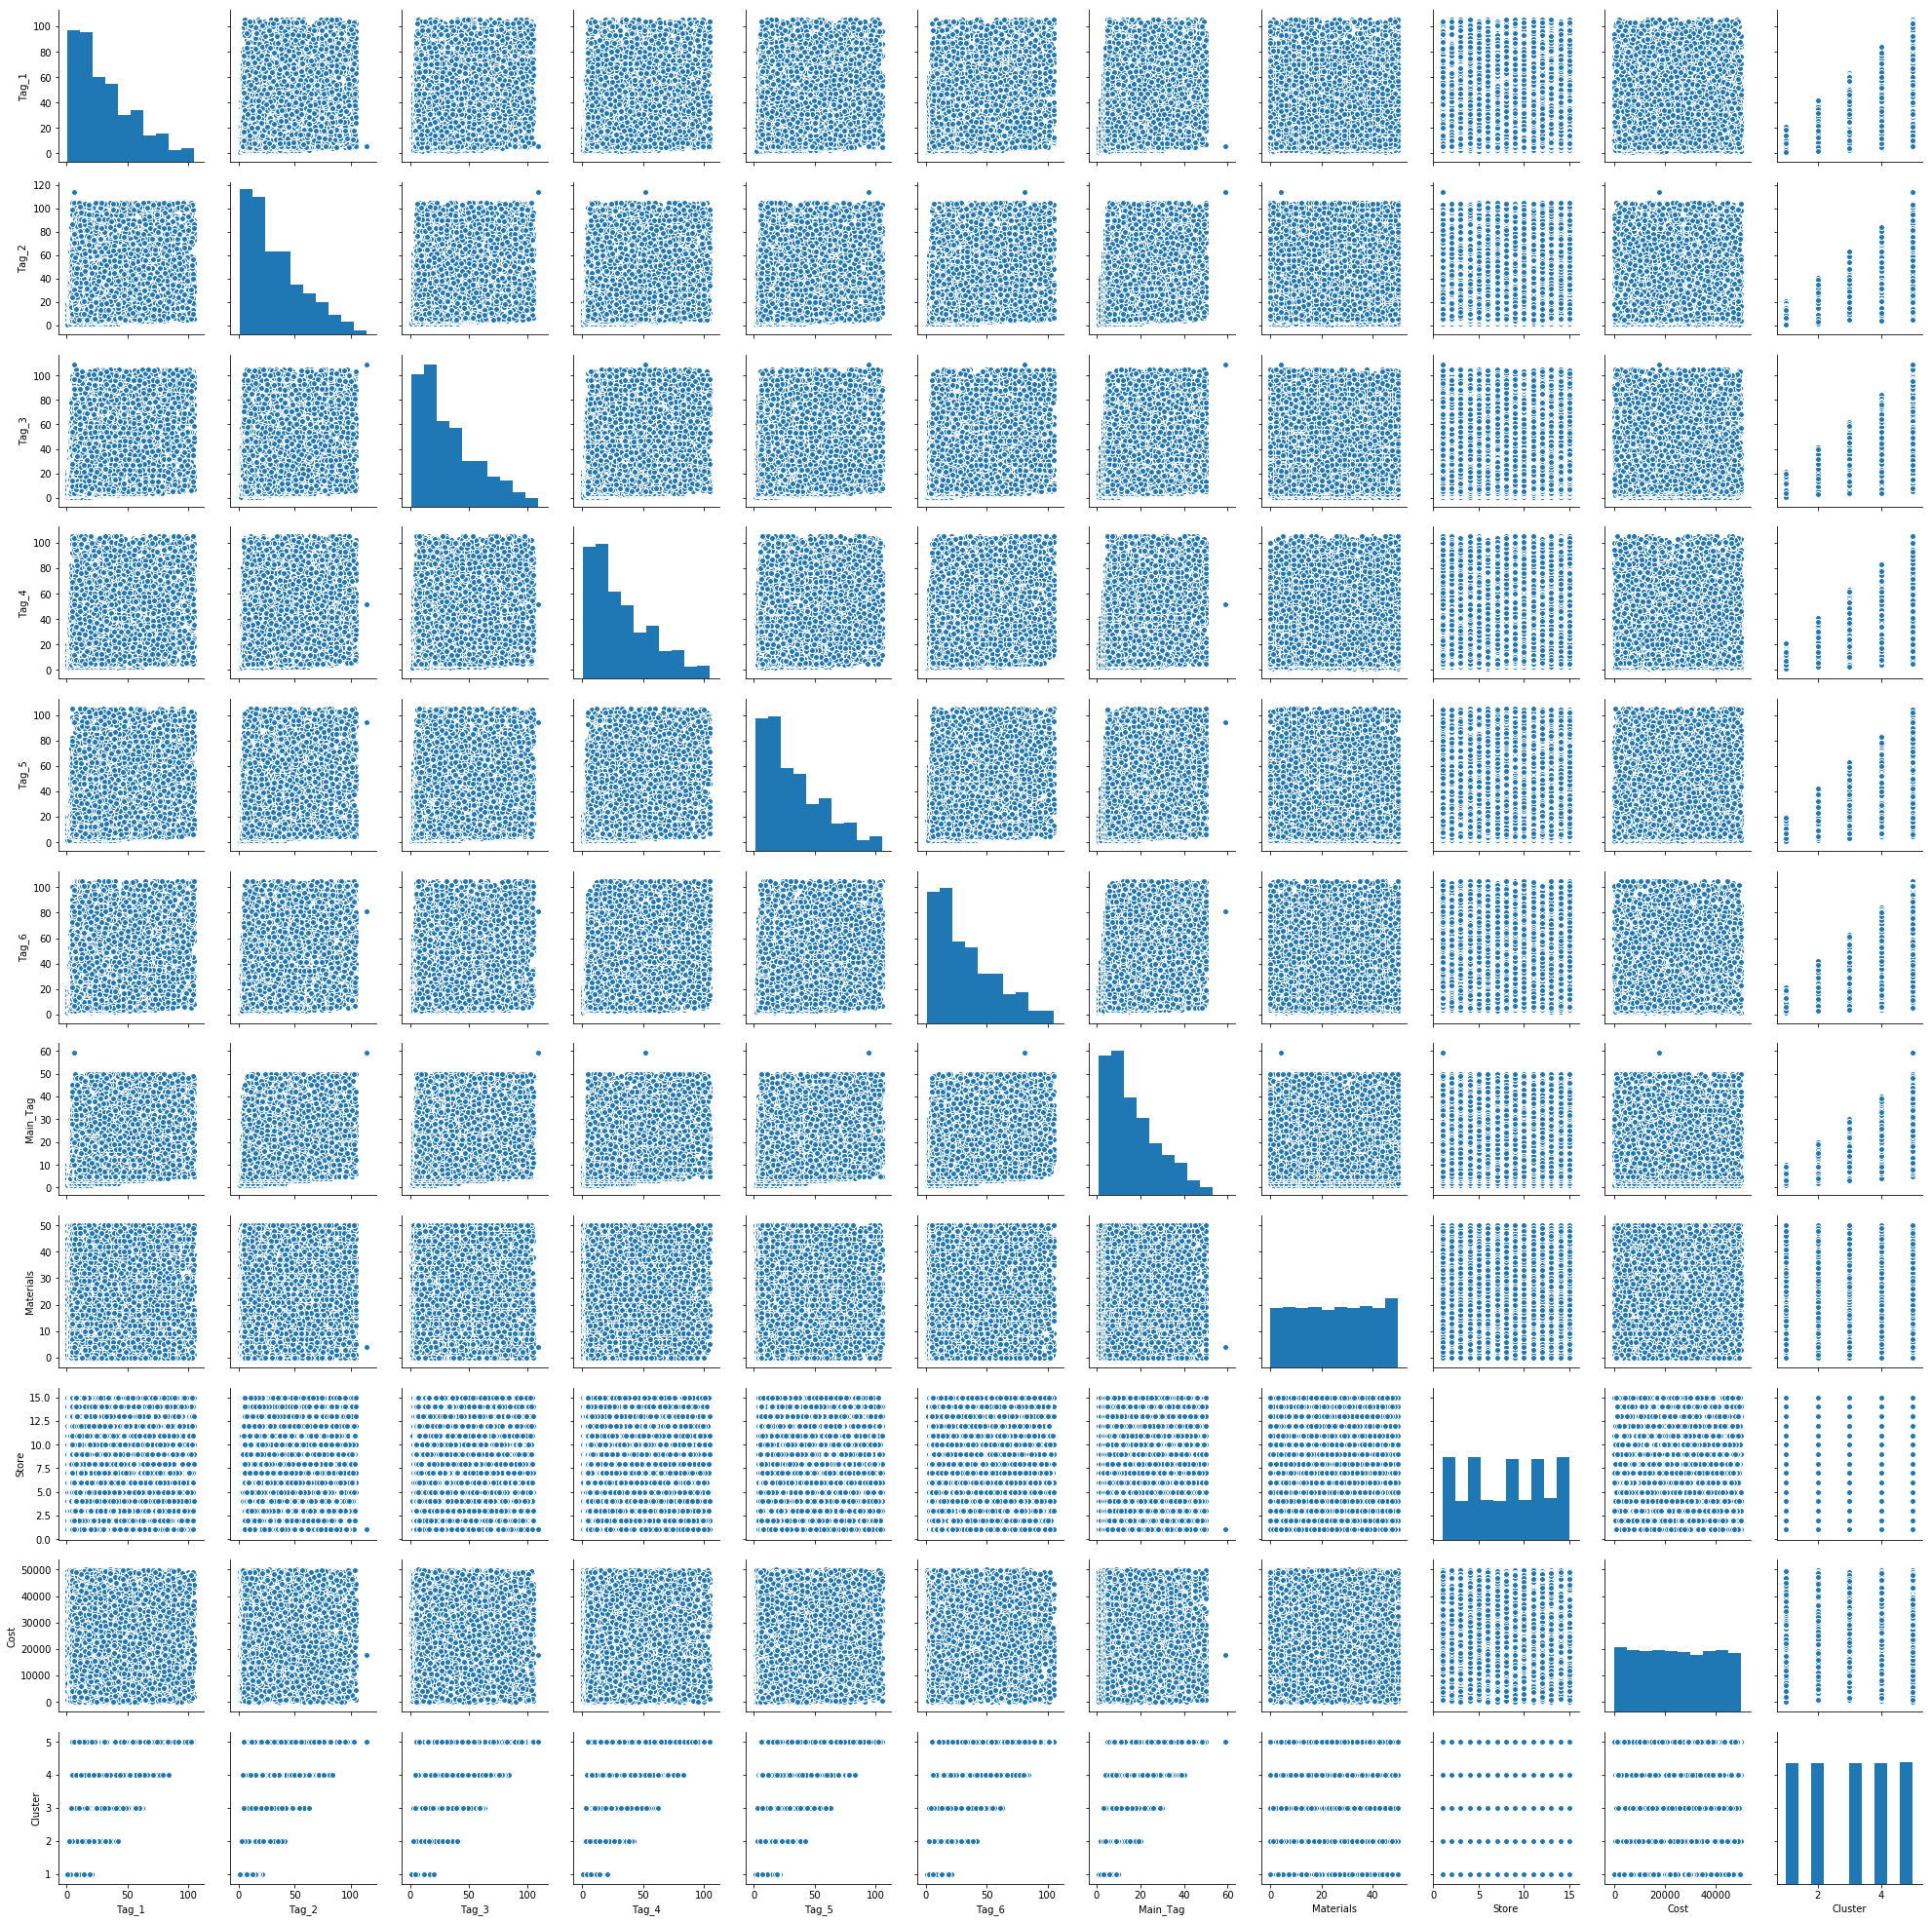

In [21]:
import seaborn as sns
cols = df.columns
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

In [22]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

AttributeError: 'DataFrame' object has no attribute 'Platform'

In [5]:
import seaborn as sns

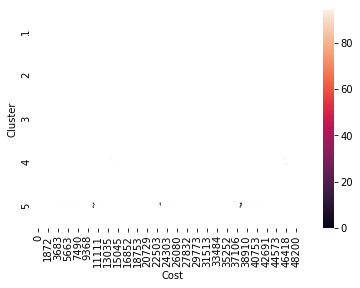

In [6]:
platform_genre_sales = df.pivot_table(
                        index='Cluster', 
                        columns='Cost', 
                        values='Main_Tag', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.8);

In [11]:
import matplotlib.pyplot as plt

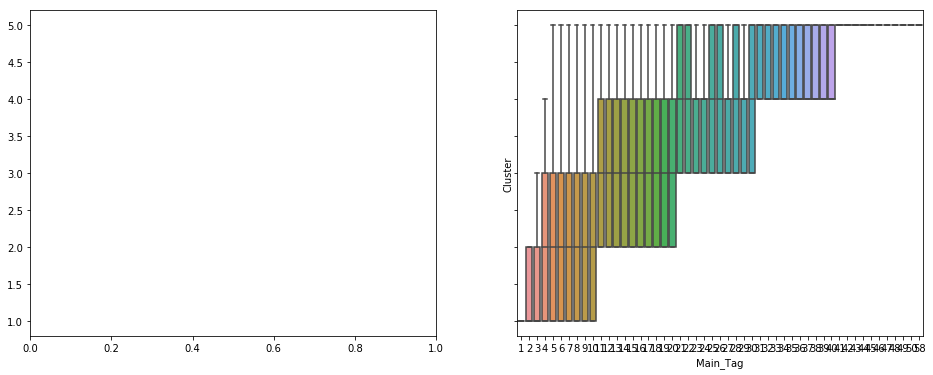

In [14]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(x='Main_Tag', y='Cluster', data=df);

In [21]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('../../data/telecom_churn.csv')
df.head()

# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)
tsne_representation

Wall time: 1min 25s


In [28]:
tsne_representation

array([[ 20.893032 , -56.754536 ],
       [ 50.345577 , -54.99307  ],
       [-16.230436 ,  55.14406  ],
       ...,
       [ 12.476444 ,  -3.7970572],
       [-18.61505  , -37.22174  ],
       [ 18.323473 , -51.56091  ]], dtype=float32)

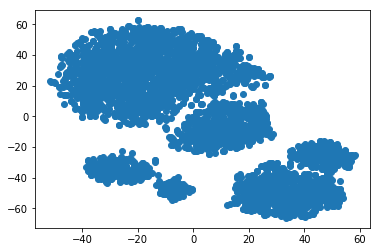

In [32]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [132]:
import pandas as pd
N = 1000
dg = pd.DataFrame([rd.randint(1,100) for x in range(N)])
dg_2 = pd.DataFrame([rd.randint(1,100) for x in range(N)])
dg_3 = pd.DataFrame([rd.randint(1,2) for x in range(N)])
dg_all = pd.DataFrame([rd.randint(0,2) for x in range(N)])

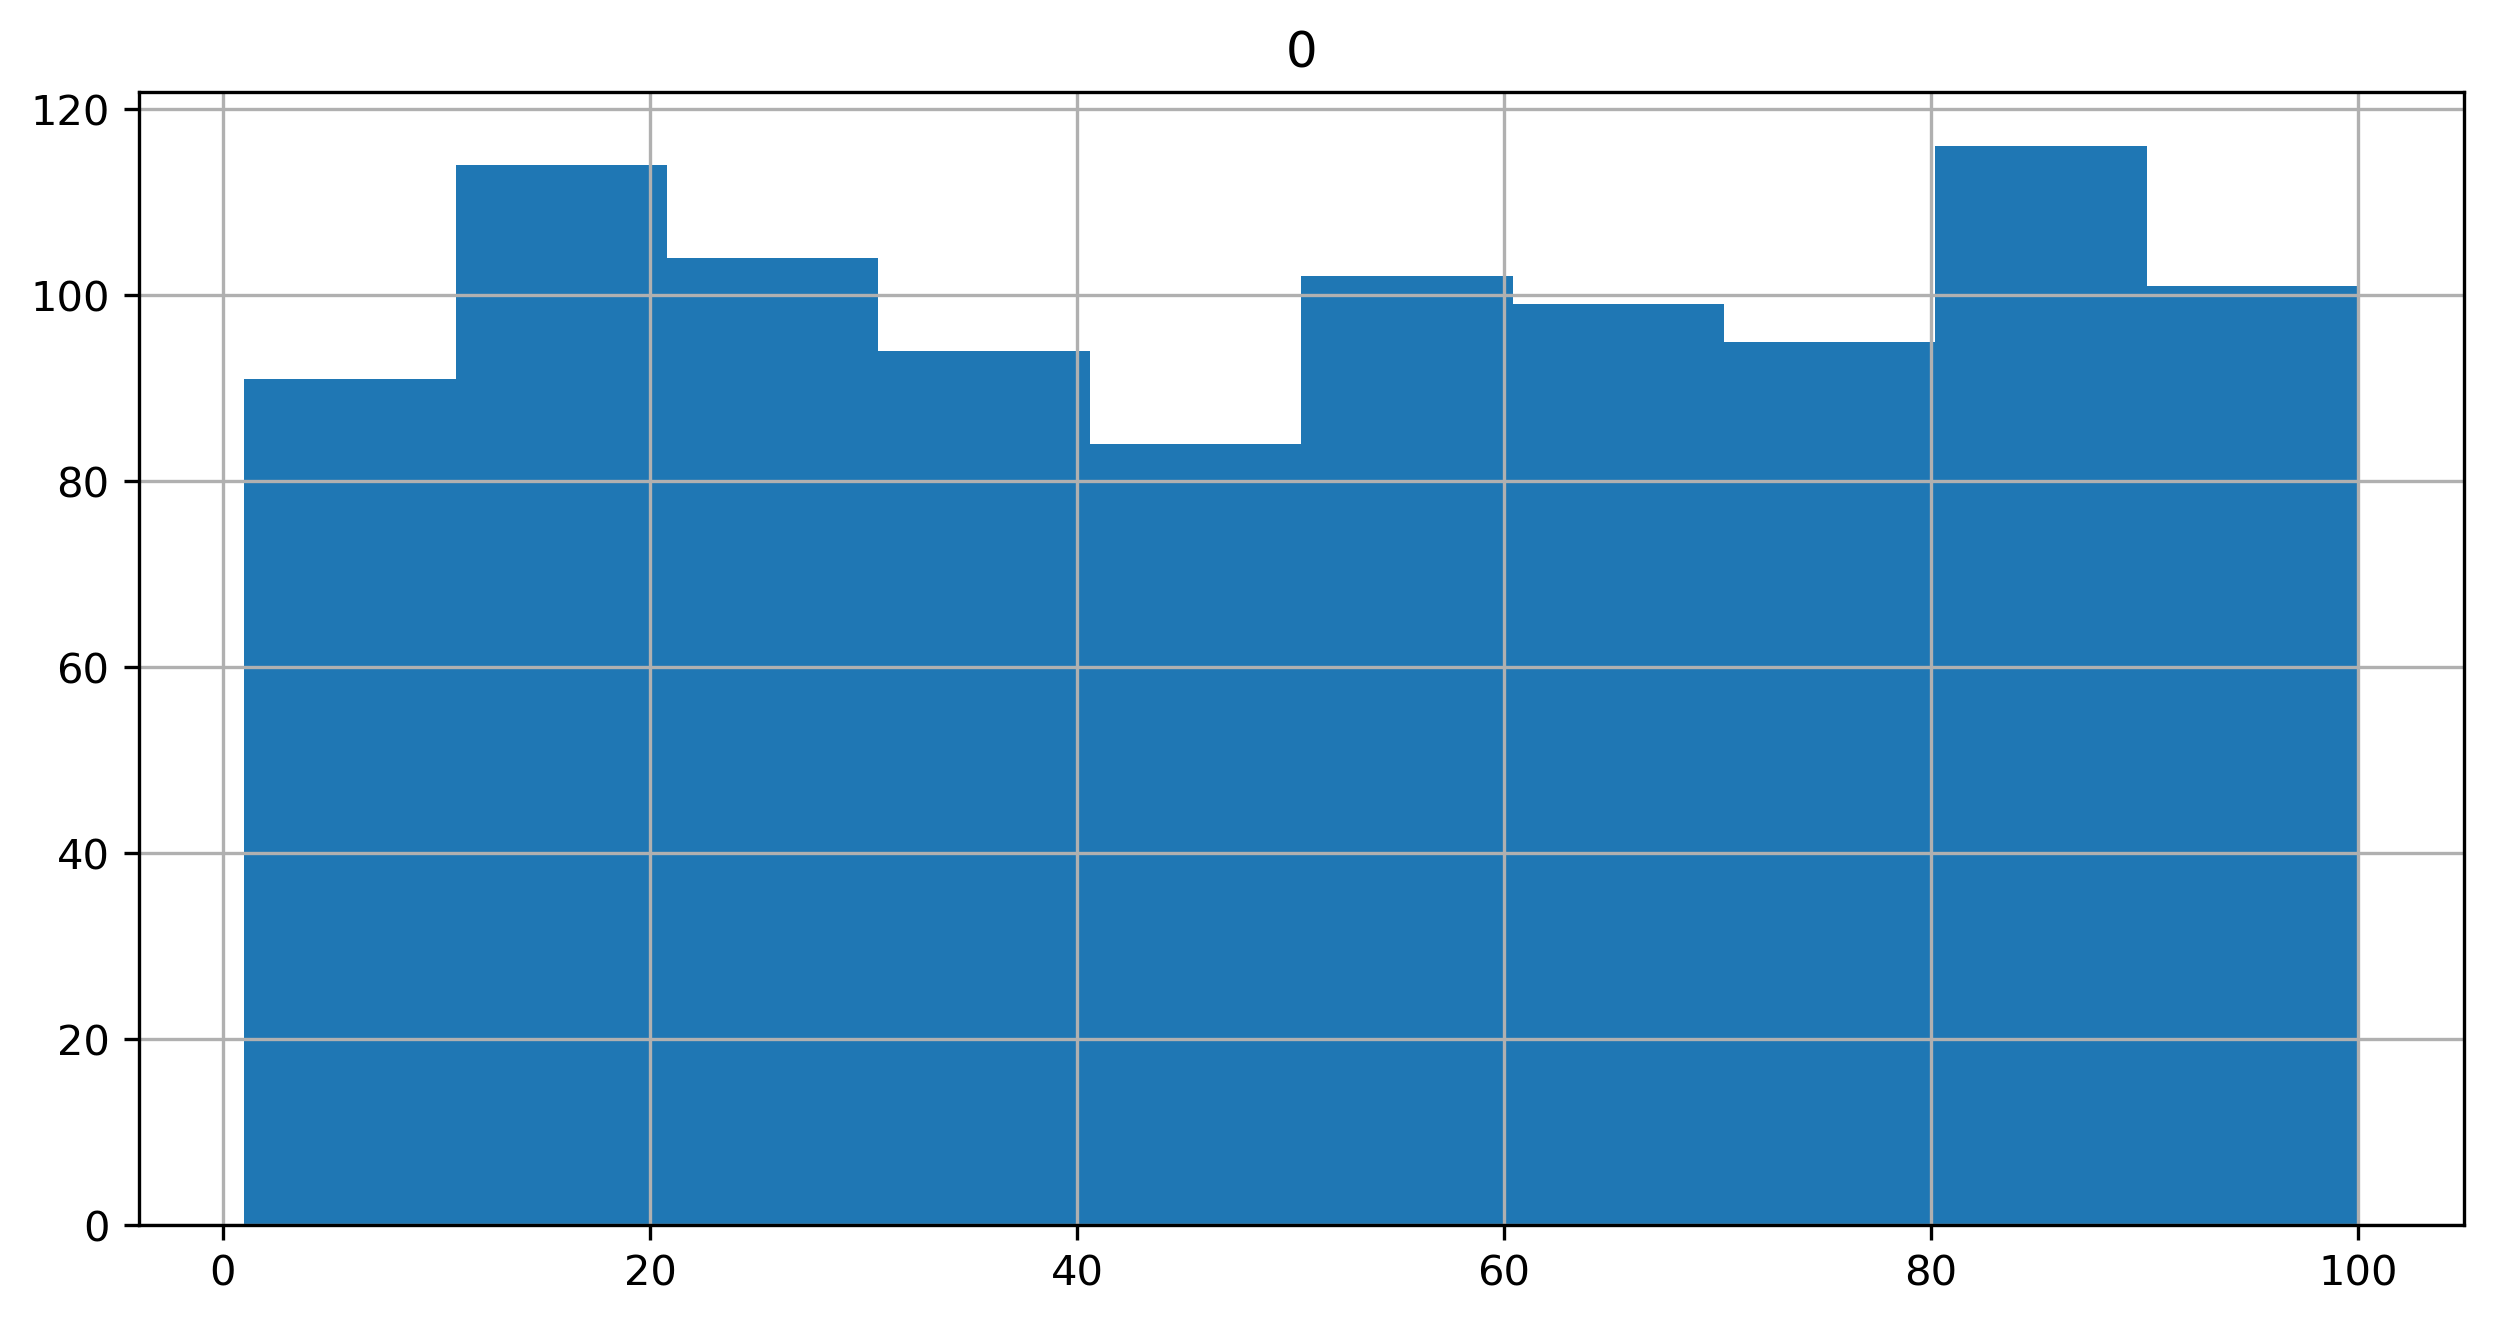

In [133]:
dg.hist();

In [134]:
x = 0
dg_2.loc[0][0]

54

In [135]:
dg.head()

,0
0,17
1,36
2,92
3,10
4,18


In [136]:
dg_2.head()

,0
0,54
1,51
2,79
3,38
4,12


In [137]:
dg_all.head()

,0
0,1
1,1
2,1
3,0
4,1


In [ ]:
plt.scatter(dg, dg_2, dg_3,
            c=dg_all[0].map({0: 'blue', 1: 'orange', 2: 'red'}));

In [138]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(100, 600), dpi=100, facecolor='b', edgecolor='k')

<Figure size 10000x60000 with 0 Axes>

<Figure size 10000x60000 with 0 Axes>

In [113]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)
pylab.rcParams['figure.dpi'] = 300


Populating the interactive namespace from numpy and matplotlib


In [129]:
# Стандартное импортирование plotly
#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff

# Использование cufflinks в офлайн-режиме
#!pip install cufflinks
import cufflinks
cufflinks.go_offline()
 
# Настройка глобальной темы cufflinks
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [19]:
!jupyter labextension install @jupyterlab/plotly-extension


Errored, use --debug for full output:
ValueError: Please install nodejs 5+ and npm before continuing. nodejs may be installed using conda or directly from the nodejs website.


In [17]:
corrs = df.corr()
 
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

In [14]:
df.columns

Index(['Tag_1', 'Tag_2', 'Tag_3', 'Tag_4', 'Tag_5', 'Tag_6', 'Main_Tag',
       'Materials', 'Store', 'Cost', 'Cluster'],
      dtype='object')

In [16]:
figure = ff.create_scatterplotmatrix(
    df[df.columns],
    diag='histogram',
    index='Cluster')

In [ ]:
df['Main_Tag'].iplot(kind='hist', xTitle='claps',
                  yTitle='count', title='Claps Distribution')

In [ ]:
df.to_csv('train.csv')

In [ ]:
df.to_csv('test.csv')